In [65]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Section 2

In [25]:
df = pd.read_csv('ex1data1.txt',header=None,names=['Pop','Profit'])

In [26]:
df[:5]

,Pop,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [27]:
len(df.Pop)

97

(-5, 25)

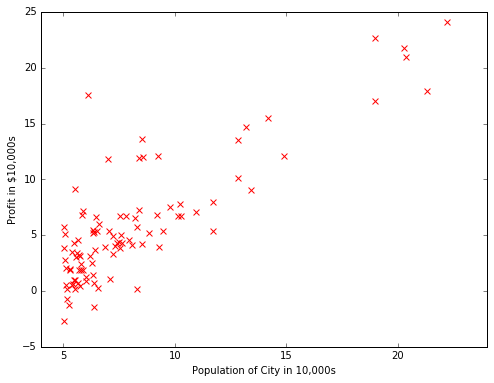

In [63]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.scatter(df.Pop,df.Profit,marker='x',c='r',s=35)
ax.set_xlabel('Population of City in 10,000s')
ax.set_ylabel('Profit in $10,000s')
plt.xlim([4,24])
plt.ylim([-5,25])

In [74]:
theta = np.polyfit(df.Pop,df.Profit,2)
h = np.poly1d(theta)
xx = np.linspace(df.Pop.min(), df.Pop.max(), 100)

(-5, 25)

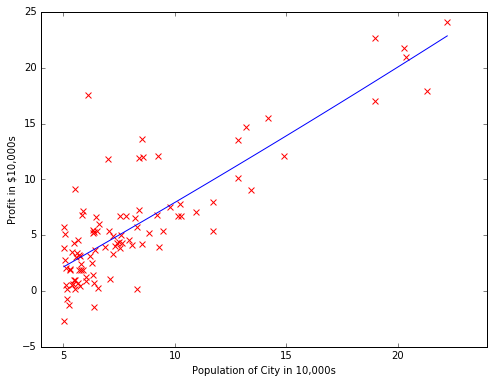

In [75]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.scatter(df.Pop,df.Profit,marker='x',c='r',s=35)
ax.plot(xx,h(xx),'b-')
ax.set_xlabel('Population of City in 10,000s')
ax.set_ylabel('Profit in $10,000s')
plt.xlim([4,24])
plt.ylim([-5,25])

In [79]:
print(h(3.5))
print(h(7))

0.447116281495
4.43949442281


# Section 3

In [80]:
houses=pd.read_csv('ex1data2.txt',header=None,names=['Size','Bedrooms','Price'])

In [121]:
for name in list(houses.columns.values):
    houses[str(name)+'_n'] = (houses[name]-houses[name].mean())/houses[name].std()

In [230]:
houses[:5]

,Size,Bedrooms,Price,Size_n,Bedrooms_n,Price_n
0,2104,3,399900,0.130010,-0.223675,0.475747
1,1600,3,329900,-0.504190,-0.223675,-0.084074
2,2400,3,369000,0.502476,-0.223675,0.228626
3,1416,2,232000,-0.735723,-1.537767,-0.867025
4,3000,4,539900,1.257476,1.090417,1.595389


In [119]:
#del houses['Price_n']
#del houses['Size_n']
#del houses['Bedrooms_n']

### Quick fit to size vs price & bedrooms vs price to get a sense of goodness of 3 parameter fit.

In [123]:
from scipy.optimize import curve_fit

In [262]:
xones = np.insert(houses.values[:,3:], 0, 1., axis=1)
n = len(xones[0])
p0 = np.zeros(n-1)

In [288]:
xones[:5,:2]

array([[ 1.        ,  0.13000987],
       [ 1.        , -0.50418984],
       [ 1.        ,  0.50247636],
       [ 1.        , -0.73572306],
       [ 1.        ,  1.25747602]])

In [354]:
def fitFunc(x, a, b):
    return a*x[:,0] + b*x[:,1]
#sum(p[n]*x[:,n])

fitParams, fitCovariances = curve_fit(fitFunc, xones[:,:2], xones[:,3])
print(' fit coefficients:\n', fitParams)

 fit coefficients:
 [ -1.86083815e-10   8.54987591e-01]


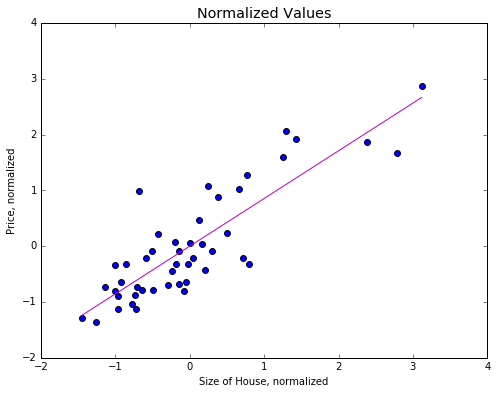

In [361]:
fitx = np.linspace(xones[:,1].min(),xones[:,1].max(),100)
fit = fitParams[0]*1 + fitParams[1]*fitx
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.scatter(xones[:,1],xones[:,3],marker='o',c='b',s=35)
ax.plot(fitx,fit,'m-')
ax.set_xlabel('Size of House, normalized')
ax.set_ylabel('Price, normalized')
ax.set_title('Normalized Values',fontsize='x-large')

In [356]:
x1 = -1
x2 = 2
y1 = fitParams[0]*1 + fitParams[1]*x1
y2 = fitParams[0]*1 + fitParams[1]*x2
n_x1 = x1*houses.Size.std()+houses.Size.mean()
n_x2 = x2*houses.Size.std()+houses.Size.mean()
n_y1 = y1*houses.Price.std()+houses.Price.mean()
n_y2 = y2*houses.Price.std()+houses.Price.mean()

m = (n_y1-n_y2)/(n_x1-n_x2)
b = n_y1-m*n_x1
print(b, m)

71270.4931293 134.525287368


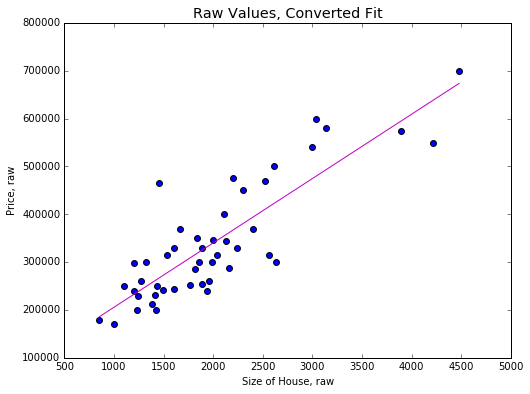

In [363]:
fitx = np.linspace(houses.Size.min(),houses.Size.max(),100)
fit = (b + m*fitx)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.scatter(houses.Size,houses.Price,marker='o',c='b',s=35)
ax.plot(fitx,fit,'m-')
ax.set_xlabel('Size of House, raw')
ax.set_ylabel('Price, raw')
ax.set_title('Raw Values, Converted Fit',fontsize='x-large')

In [369]:
xrawones = np.insert(houses.values[:,:3], 0, 1., axis=1)
print(xrawones[:3])
n = len(xrawones[0])
p0 = np.zeros(n-1)

def fitFunc(x, *p):
    return p[0]*x[:,0] + p[1]*x[:,1] + p[2]*x[:,2]

bruteParams, bruteCovariances = curve_fit(fitFunc, (xrawones[:,:3]), xrawones[:,3], p0=p0)
print(' fit coefficients:\n', bruteParams)

[[  1.00000000e+00   2.10400000e+03   3.00000000e+00   3.99900000e+05]
 [  1.00000000e+00   1.60000000e+03   3.00000000e+00   3.29900000e+05]
 [  1.00000000e+00   2.40000000e+03   3.00000000e+00   3.69000000e+05]]
 fit coefficients:
 [ 89597.91247566    139.21067669  -8738.02165615]


In [372]:
#Generic form for unlimited number of parameters
def fitFunc(x, *p):
    return np.sum(p*x,axis=1)

genParams, genCovariances = curve_fit(fitFunc, (xrawones[:,:3]), xrawones[:,3], p0=(0,0,0))
print(' fit coefficients:\n', genParams)

 fit coefficients:
 [ 89597.91247566    139.21067669  -8738.02165615]


In [373]:
#test values, 1650 sqft, 3 bdrms
print(genParams[0]*1+genParams[1]*1650.+genParams[2]*3)

293081.464043


# Section 3.3

In [236]:
X = np.insert(houses.values[:,:2], 0, 1., axis=1)
y = houses.values[:,2]

In [233]:
Theta = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(X),X)),np.transpose(X)),y)
print(Theta)

[ 89597.9095428     139.21067402  -8738.01911233]


In [235]:
h_Theta = Theta[0]*X[:,0] + Theta[1]*X[:,1] + Theta[2]*X[:,2]
print(h_Theta-houses.values[:,2])

[ -43616.8896611   -43779.06936599   28489.46984811   37244.1857271
  -67622.14485364   31079.02101847  -37966.97385115   63038.48402897
   43494.58235014   28864.59918815   84715.54068768   -5194.79975894
   -3506.97390087  -30606.78776792  -19997.01313984  -75069.61666598
  -44020.03897859   35548.2452916   -82151.51839453 -122406.61395909
   56469.11319496   79951.62386342   43777.77333008   67877.17551607
   31013.37413438  -33384.4063748  -198146.98507649  -53969.98522566
 -105352.66495541  130582.39959029  -21769.69916345   50170.5644481
   23735.60808944  -79812.2634009    20856.36373941   13529.59076914
    5965.87731365    6442.99009906   92418.82407778   68619.31031959
  -64731.56711653   45037.34065726   97999.63329673  -68563.33897304
   10829.36558116   12564.00137413   -8645.70695098]


In [237]:
#test values, 1650 sqft, 3 bdrm
print(Theta[0]*1. + Theta[1]*1650. + Theta[2]*3)

293081.464335
